In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
getcwd()

'/home/tavi/bladder-analyses/analyses/notebooks'

In [3]:
path.dirname(getcwd())

'/home/tavi/bladder-analyses/analyses'

In [4]:
from utils import data

In [5]:
cohort = data.init_cohort(join_with="tcr_peripheral_a",
                          exclude_patient_ids=set(),
                          only_patients_with_bams=False)

inner join with tcr_peripheral_a: 29 to 29 rows
inner join with tcr_peripheral_a: 29 to 29 rows
{'dataframe_hash': -8062678075537494193,
 'provenance_file_summary': {u'cohorts': u'0.5.0+1.gf382e8a.dirty',
                             u'isovar': u'0.5.2',
                             u'mhctools': u'0.3.1',
                             u'numpy': u'1.11.2',
                             u'pandas': u'0.19.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [6]:
from utils.paper import *

In [7]:
from cohorts.functions import *

In [8]:
def plot_all(function, description):
    print("PFS Benefit:")
    mann_whitney_hyper_label_printer(
        cohort.plot_benefit(on={description: function}),
        label="pbmc_a_pfs")
    plt.show()
    print("OS Benefit:")
    mann_whitney_hyper_label_printer(
        cohort.plot_benefit_os(on={description: function}),
        label="pbmc_a_os")
    plt.show()
    
    survival_hyper_label_printer(
        cohort.plot_survival(on={description: function}, how="pfs"),
        "pbmc_a_pfs_curve")
    plt.show()
    survival_hyper_label_printer(
        cohort.plot_survival(on={description: function}, how="os"),
        "pbmc_a_os_curve")
    plt.show()

PFS Benefit:
inner join with tcr_peripheral_a: 29 to 29 rows
Mann-Whitney test: U=65.0, p-value=0.248114557042 (two-sided)
{{{pbmc_a_pfs_plot}}}
{{{pbmc_a_pfs_benefit:0.068 (range 0.027-0.21)}}}
{{{pbmc_a_pfs_no_benefit:0.14 (range 0.022-0.35)}}}
{{{pbmc_a_pfs_mw:n=29, Mann-Whitney p=0.25}}}


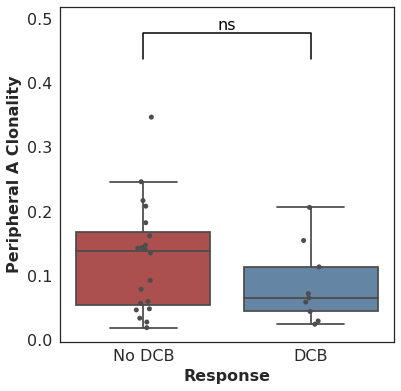

OS Benefit:
inner join with tcr_peripheral_a: 29 to 29 rows
Mann-Whitney test: U=41.0, p-value=0.00612886249432 (two-sided)
{{{pbmc_a_os_plot}}}
{{{pbmc_a_os_benefit:0.060 (range 0.022-0.21)}}}
{{{pbmc_a_os_no_benefit:0.15 (range 0.031-0.35)}}}
{{{pbmc_a_os_mw:n=29, Mann-Whitney p=0.0061}}}


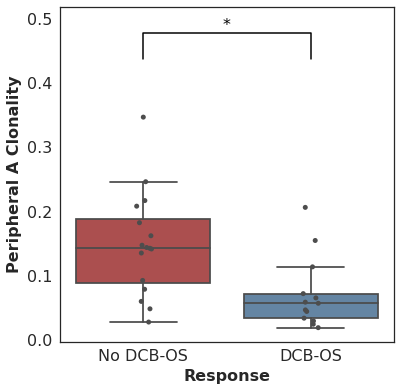

inner join with tcr_peripheral_a: 29 to 29 rows
# no condition 15
# with condition 14
{{{pbmc_a_pfs_curve_plot}}}
{{{pbmc_a_pfs_curve_logrank:n=29, log-rank p=0.048}}}


/home/tavi/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


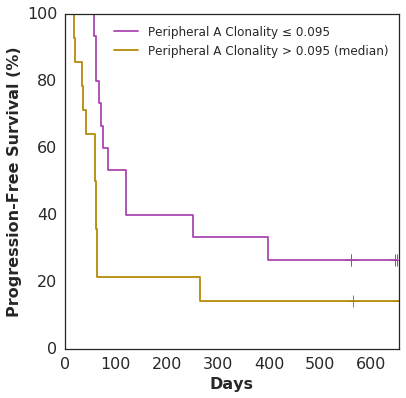

inner join with tcr_peripheral_a: 29 to 29 rows
# no condition 15
# with condition 14
{{{pbmc_a_os_curve_plot}}}
{{{pbmc_a_os_curve_logrank:n=29, log-rank p=0.011}}}


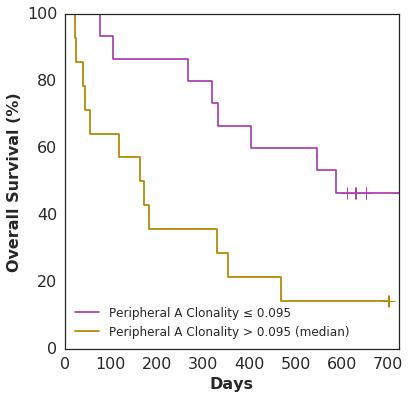

In [9]:
plot_all("Clonality", "Peripheral A Clonality")

In [10]:
cohort = data.init_cohort(join_with="tcr_tumor", 
                          exclude_patient_ids=set(),
                          only_patients_with_bams=False)

inner join with tcr_tumor: 29 to 24 rows
inner join with tcr_tumor: 29 to 24 rows
{'dataframe_hash': -2467646966976180658,
 'provenance_file_summary': {u'cohorts': u'0.5.0+1.gf382e8a.dirty',
                             u'isovar': u'0.5.2',
                             u'mhctools': u'0.3.1',
                             u'numpy': u'1.11.2',
                             u'pandas': u'0.19.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [11]:
df = cohort.as_dataframe()

inner join with tcr_tumor: 29 to 24 rows


In [12]:
colors = []
for response in df["Best Response RECIST 1.1"]:
    if response.strip().lower() in ["cr", "pr"]:
        colors.append("green")
    elif response.strip().lower() == "pd":
        colors.append("red")
    else:
        colors.append("black")

Green = CR/PR, Red = PD, Black = Neither


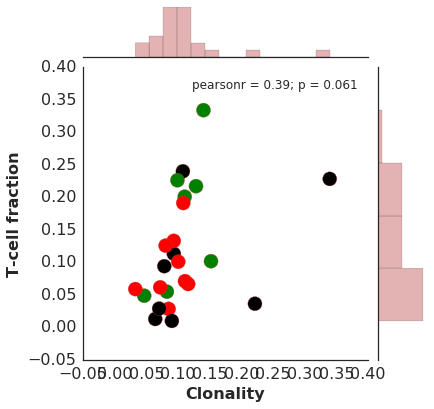

In [13]:
print("Green = CR/PR, Red = PD, Black = Neither")
sb.jointplot(data=df, x="Clonality", y="T-cell fraction", s=200,
             c=colors)

Green = PFS Benefit


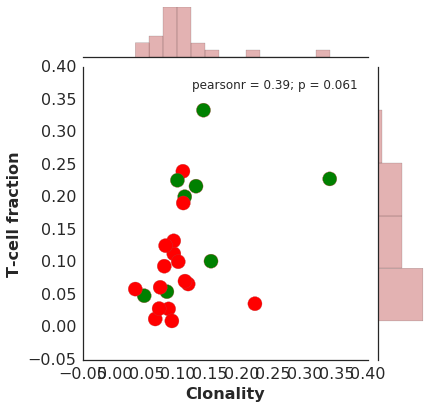

In [14]:
print("Green = PFS Benefit")
sb.jointplot(data=df, x="Clonality", y="T-cell fraction", s=200,
             c=["green" if benefit else "red" for benefit in df.is_benefit])

Green = OS Benefit


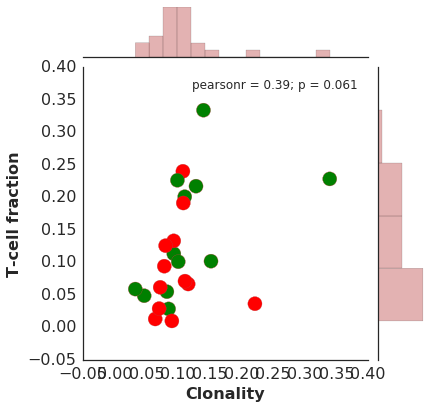

In [15]:
print("Green = OS Benefit")
sb.jointplot(data=df, x="Clonality", y="T-cell fraction", s=200,
             c=["green" if benefit else "red" for benefit in df.is_benefit_os])

In [16]:
from utils.paper import *

In [17]:
from scipy.stats import spearmanr

inner join with tcr_tumor: 29 to 24 rows
{{{tilfraction_pdl1_plot}}}
{{{tilfraction_pdl1_spearmanr:n=24, Spearman rho=0.51 p=0.010}}}


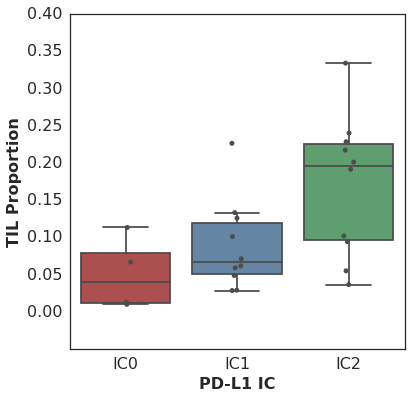

In [18]:
result = cohort.plot_correlation({"PD-L1 IC": lambda row: int(row["PD-L1"].split("IC")[1]),
                                    "TIL Proportion": 
                                      lambda row: row["T-cell fraction"]},
                                    plot_type="boxplot",
                                    x_col="PD-L1 IC",
                                    stat_func=spearmanr)
result.plot.set_xticklabels(["IC0", "IC1", "IC2"])
spearmanr_hyper_label_printer(result, label="tilfraction_pdl1")

inner join with tcr_tumor: 29 to 24 rows


{{{tilclonality_pdl1_plot}}}
{{{tilclonality_pdl1_spearmanr:n=24, Spearman rho=0.48 p=0.017}}}


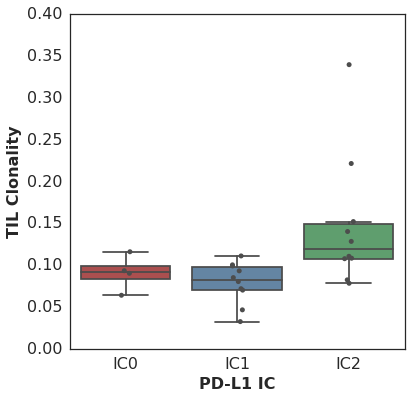

In [19]:
result = cohort.plot_correlation({"PD-L1 IC": lambda row: int(row["PD-L1"].split("IC")[1]),
                                    "TIL Clonality": 
                                      lambda row: row["Clonality"]},
                                    plot_type="boxplot",
                                    x_col="PD-L1 IC",
                                    stat_func=spearmanr)
result.plot.set_xticklabels(["IC0", "IC1", "IC2"])
spearmanr_hyper_label_printer(result, label="tilclonality_pdl1")

In [20]:
cohort_tcr_a_b = data.init_cohort(join_with="tcr_expansion_a_b", 
                          exclude_patient_ids=set(),
                          only_patients_with_bams=False)

inner join with tcr_expansion_a_b: 29 to 22 rows
inner join with tcr_expansion_a_b: 29 to 22 rows


{'dataframe_hash': -3708790230929705357,
 'provenance_file_summary': {u'cohorts': u'0.5.0+1.gf382e8a.dirty',
                             u'isovar': u'0.5.2',
                             u'mhctools': u'0.3.1',
                             u'numpy': u'1.11.2',
                             u'pandas': u'0.19.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [21]:
cohort_tcr_a_c = data.init_cohort(join_with="tcr_expansion_a_c", 
                          exclude_patient_ids=set(),
                          only_patients_with_bams=False)

inner join with tcr_expansion_a_c: 29 to 20 rows
inner join with tcr_expansion_a_c: 29 to 20 rows


{'dataframe_hash': 6199429255182631239,
 'provenance_file_summary': {u'cohorts': u'0.5.0+1.gf382e8a.dirty',
                             u'isovar': u'0.5.2',
                             u'mhctools': u'0.3.1',
                             u'numpy': u'1.11.2',
                             u'pandas': u'0.19.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


inner join with tcr_expansion_a_b: 29 to 22 rows


Mann-Whitney test: U=89.5, p-value=0.0224798103147 (two-sided)
{{{a_b_til_expansion_plot}}}
{{{a_b_til_expansion_benefit:8.00 (range 4.00-12.00)}}}
{{{a_b_til_expansion_no_benefit:2.50 (range 1.00-18.00)}}}
{{{a_b_til_expansion_mw:n=22, Mann-Whitney p=0.022}}}


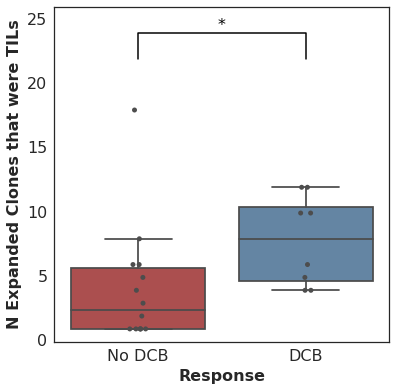

In [22]:
mann_whitney_hyper_label_printer(cohort_tcr_a_b.plot_benefit(
        "N Expanded Clones that were TILs", col="# Expanded Clones that were TILs"), label="a_b_til_expansion")

inner join with tcr_expansion_a_c: 29 to 20 rows
Mann-Whitney test: U=66.0, p-value=0.165059739175 (two-sided)
{{{a_c_til_expansion_plot}}}
{{{a_c_til_expansion_benefit:3.00 (range 1.00-9.00)}}}
{{{a_c_til_expansion_no_benefit:2.00 (range 1.00-8.00)}}}
{{{a_c_til_expansion_mw:n=20, Mann-Whitney p=0.17}}}


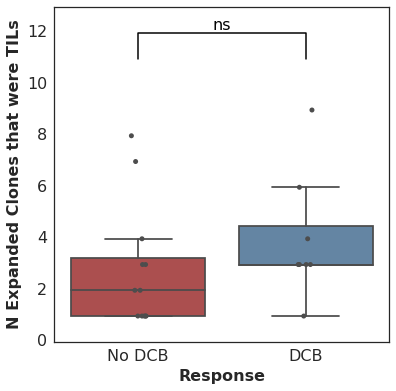

In [23]:
mann_whitney_hyper_label_printer(cohort_tcr_a_c.plot_benefit(
        "N Expanded Clones that were TILs", col="# Expanded Clones that were TILs"), label="a_c_til_expansion")

In [24]:
def crpr(row):
    best_response = row["Best Response RECIST 1.1"].strip().lower()
    if best_response in ["cr", "pr"]:
        return True
    elif best_response == "pd" or "baseline" in best_response:
        return False
    import numpy as np
    return np.nan

inner join with tcr_expansion_a_b: 29 to 22 rows
Missing CR/PR for 4 patients: from 22 to 18
Mann-Whitney test: U=60.0, p-value=0.0556473354668 (two-sided)


MannWhitneyResults(U=60.0, p_value=0.0556473354668, sided_str='two-sided')

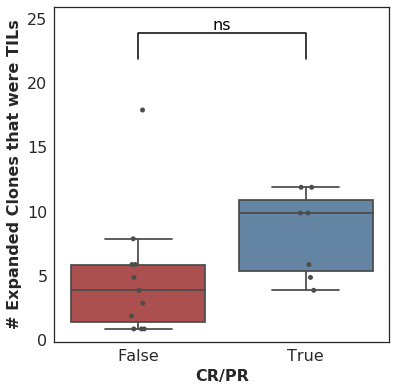

In [25]:
cohort_tcr_a_b.plot_boolean(on={"# Expanded Clones that were TILs": lambda row: row["N Expanded Clones that were TILs"], "CR/PR": crpr}, 
                    boolean_col="CR/PR", plot_col="# Expanded Clones that were TILs")

inner join with tcr_expansion_a_b: 29 to 22 rows
Missing CR/PR for 4 patients: from 22 to 18
Mann-Whitney test: U=60.0, p-value=0.0556473354668 (two-sided)


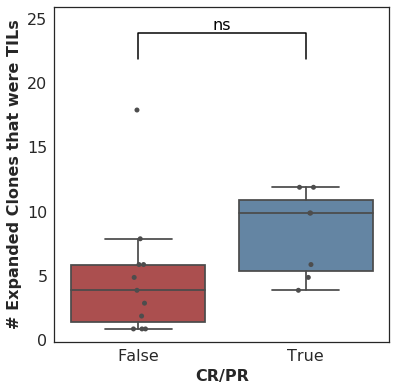

In [26]:
results_a_b = cohort_tcr_a_b.plot_boolean(on={"# Expanded Clones that were TILs": lambda row: row["N Expanded Clones that were TILs"], "CR/PR": crpr}, 
                    boolean_col="CR/PR", plot_col="# Expanded Clones that were TILs")

In [27]:
results_a_b.with_condition_series.mean()

8.4285714285714288

In [28]:
results_a_b.without_condition_series.mean()

5.0

inner join with tcr_expansion_a_c: 29 to 20 rows
Missing CR/PR for 3 patients: from 20 to 17
Mann-Whitney test: U=45.0, p-value=0.344232058625 (two-sided)


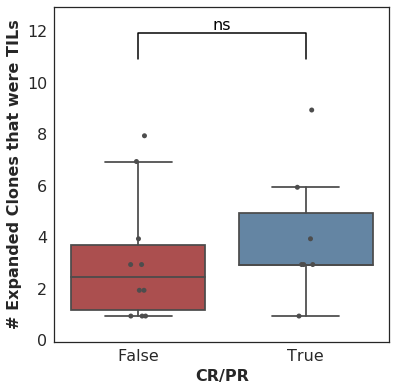

In [29]:
results_a_c = cohort_tcr_a_c.plot_boolean(on={"# Expanded Clones that were TILs": lambda row: row["N Expanded Clones that were TILs"], "CR/PR": crpr}, 
                    boolean_col="CR/PR", plot_col="# Expanded Clones that were TILs")

In [30]:
results_a_c.with_condition_series.mean()

4.1428571428571432

In [31]:
results_a_c.without_condition_series.mean()

3.2000000000000002

In [32]:
def expanded_clones_barplot():
    df_tcr_a_b = cohort_tcr_a_b.as_dataframe()
    df_tcr_a_b = df_tcr_a_b.set_index("patient_id", drop=False).sort_values(
        by="N Expanded Clones that were TILs")
    import matplotlib.colors as colors
    red = colors.hex2color("#bb3f3f")
    blue = colors.hex2color("#5a86ad")
    palette = [blue if row["is_benefit"] else red for i, row in df_tcr_a_b.iterrows()]
    plot_expanded = sb.barplot(data=df_tcr_a_b, x="patient_id", y="N Expanded Clones", 
               order=df_tcr_a_b.index, palette=palette)
    plot_expanded_tils = sb.barplot(data=df_tcr_a_b, x="patient_id", 
               order=df_tcr_a_b.index,
               y="N Expanded Clones that were TILs", color="orange")
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt
    no_benefit_patch = mpatches.Patch(color=red, label="No " + cohort.benefit_plot_name)
    benefit_patch = mpatches.Patch(color=blue, label=cohort.benefit_plot_name)
    til_patch = mpatches.Patch(color="orange", label="# Expanded TIL Clones")
    plot_expanded.set_xticklabels(plot_expanded.xaxis.get_majorticklabels(), rotation=70)
    plot_expanded.set_xlabel("Subject ID")
    plot_expanded.set_ylabel("# Expanded Clones")
    plot_expanded.legend(handles=[benefit_patch, no_benefit_patch, til_patch],
                         bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

{{{expanded_clones_barplot}}}
inner join with tcr_expansion_a_b: 29 to 22 rows


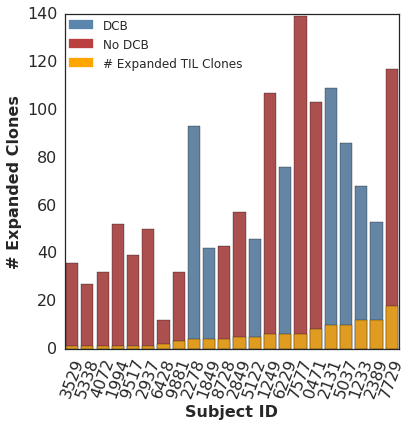

In [33]:
hyper_figure_label_printer(label="expanded_clones_barplot")
expanded_clones_barplot()